In [1]:
import os
import sys
import random
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from design_gene_blocks import DesignEblocks


# # For plasmid viewing
# import biotite.sequence as seq
# import biotite.sequence.io.genbank as gb
# import biotite.sequence.graphics as graphics
# import biotite.database.entrez as entrez
# from biotite.sequence import Feature, Location, Annotation

# !pip3 install openpyxl

# from eblocks import Mutation, Eblocks, EblockDesign, Sequence
from mutation import Mutation
from sequence import Plasmid
from eblocks import Eblocks, EblockDesign
from primer import DesignPrimers
from plot import Plot

%load_ext autoreload
%autoreload 2

# !pip install dna_features_viewer

In [2]:
mutation_instance = Mutation()
fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output\mutations_random_Msmeg_DnaE1_N27_2023-12-05.txt"
result = mutation_instance.parse_mutations(fp)
print(len(mutation_instance.mutations))

sequence_instance = Plasmid()
sequence_instance.parse_sequence(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta")
sequence_instance.parse_vector(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\snapgene_vector_valid_1.dna")
print(sequence_instance.sequence)
print(sequence_instance.seqid)

27
atgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtggacgccgggcttcgccggcgat

In [3]:
eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,)

design_instance.run_design_eblocks()

# TODO Remove print statements (add verbose option to functions)

Optimizing based on price per bp ...
Lowest cost: 2067.15 with cluster {2: [1401, 1773, 1425, 1374, 1272, 1368, 1977, 1719, 2172], 0: [2424, 2508, 3264, 2790, 3366, 2670, 2607, 3456, 2283, 2286, 2319, 2361, 2349, 2667, 2670, 2673, 2676, 2679, 2682, 2685], 1: [834, 504, 552, 852, 516, 561, 666, 636, 261, 327, 351, 672, 675]}
Finished.


In [4]:
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output")

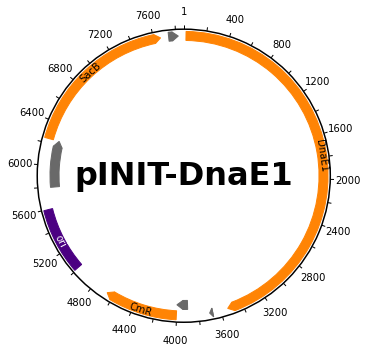

(<PolarAxesSubplot:>, <Figure size 720x360 with 1 Axes>)

In [5]:
plot_instance.show = True

plot_instance.plot_vector(figsize=(10, 5))

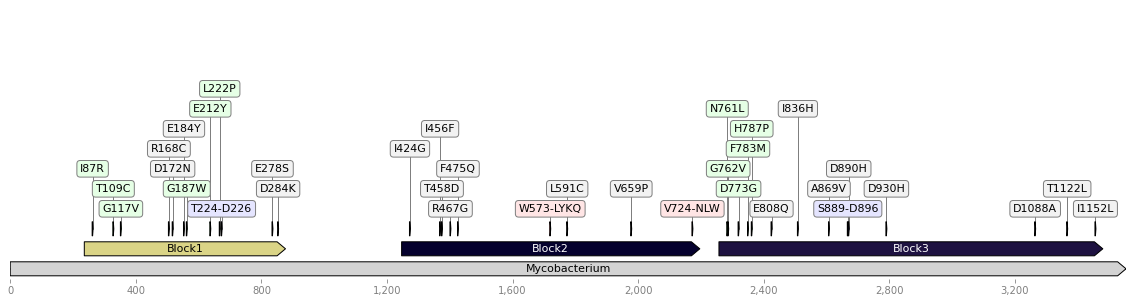

In [6]:
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

# TODO Be consistent with the figuresieze and figsize figure length, figure width as input arguments

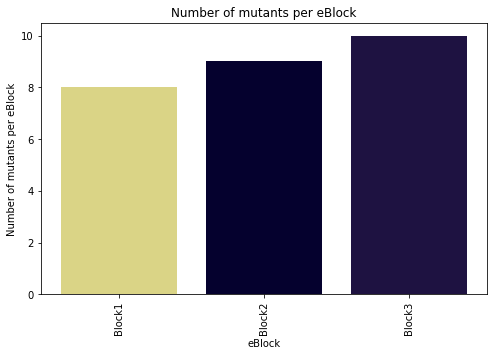

In [7]:
plot_instance.plot_histogram_mutations()

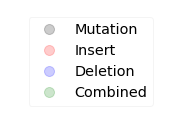

In [8]:
plot_instance.plot_mutation_legend()

In [9]:
for k, v in design_instance.eblocks.items():
    print(k, v)
    print(k)

<mutation.Mutation object at 0x000001F47405D198> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgccgtctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgtgcatgatggccgagaacgccaccgtgctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacggg', 115, 'gtg']
<mutation.Mutation object at 0x000001F4740577B8> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctc

In [10]:
# Now design primers

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblock_instance=eblocks_instance,
                                 eblocks_design_instance=design_instance,
                                 sequence_instance=sequence_instance, 
                                 output_dir=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output")

primers_instance.run_IVAprimer()

Complementarity between the IVA primers for Block_2_pos_1247_2197 exceeds threshold of 4


,Eblock,fw_sequence,rv_sequence,FW Overhang,FW Template,RV Overhang,RV Template,Tm FW Template,Tm Rv Template,Tm FW Overhang,Tm RV Overhang,end position,begin position,FW Primer (5>3),RV Primer (5>3),Max hairpin length,Max complementary length
0,Block_1_pos_236_877,atgagcggttcatctgcggggtcctccttcgtgcacctgcacaacc...,tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,gatcgccgaacggg,tgcagtcctacgccgacgtg,gagcgccaagctgtg,ctccgtatgtagcgcggccc,59.16,59.71,48.02,49.71,877,236,gatcgccgaacgggtgcagtcctacgccgacgtg,gagcgccaagctgtgctccgtatgtagcgcggccc,4.0,4.0
1,Block_2_pos_1247_2197,atgagcggttcatctgcggggtcctccttcgtgcacctgcacaacc...,tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,gcccgcgccg,acattctacgcaaggccatgggc,gtggagctacgggct,ccaaggagttggggctcgc,59.81,57.48,46.18,48.80,2197,1247,gcccgcgccgacattctacgcaaggccatgggc,gtggagctacgggctccaaggagttggggctcgc,6.0,5.0
2,Block_3_pos_2258_3481,atgagcggttcatctgcggggtcctccttcgtgcacctgcacaacc...,tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,ggcacttgatcagtcgt,tgcgggtgacgccgtc,gaagaggctaccgtacg,cacgacctcttcctcaagctccc,57.09,58.72,48.41,48.13,3481,2258,ggcacttgatcagtcgttgcgggtgacgccgtc,gaagaggctaccgtacgcacgacctcttcctcaagctccc,7.0,4.0


In [11]:
for k, v in design_instance.eblocks.items():
    print(k, v)

<mutation.Mutation object at 0x000001F47405D198> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgccgtctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgtgcatgatggccgagaacgccaccgtgctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacggg', 115, 'gtg']
<mutation.Mutation object at 0x000001F4740577B8> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctc

In [12]:
sequence_instance.sequence[22:44]

Seq('cctccttcgtgcacctgcacaa')

In [13]:
(str(sequence_instance.sequence)).find('ccgaccacggaaacatgttc')

136

In [14]:
(str(sequence_instance.sequence)).find('tcatcatcaccaccggatg')

454

In [15]:
236 + 320

556

In [67]:
start_index = 0
occurrences = 0
substring = 'tcatcatcaccaccggatg' # 'ccgaccacggaaacatgttc'
while True:
    # Search for the substring starting from start_index
    index = sequence_instance.vector.seq.find(substring, start_index)
    # If the substring is not found, break the loop
    if index == -1:
        break
    # Increment the count of occurrences
    occurrences += 1
    # Move the start_index to search for the next occurrence
    start_index = index + len(substring)
# Check if multiple occurrences were found
if occurrences > 1:
    print("Multiple occurrences found.")
else:
    print("Only one occurrence found.")

Only one occurrence found.


In [78]:
primers_instance.run_SEQprimer()

Multiple binding sites for primer ccgaccacggaaacatgttc in the vector sequence
Multiple binding sites for primer tcatcatcaccaccggatg in the vector sequence
Multiple binding sites for primer tacgcaccatctaccagac in the vector sequence
Multiple binding sites for primer agagcagatcatgcgcatc in the vector sequence
Multiple binding sites for primer ttgaacttcgcatcggtc in the vector sequence
Multiple binding sites for primer tcaacggtgtggcacacttg in the vector sequence


In [73]:
for k, v in design_instance.eblocks.items():
    print(k, v[2], v)

<mutation.Mutation object at 0x000001F47405D198> 115 ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgccgtctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgtgcatgatggccgagaacgccaccgtgctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacggg', 115, 'gtg']
<mutation.Mutation object at 0x000001F4740577B8> 268 ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacg